In [13]:
import cv2
import matplotlib.pyplot as plt

In [14]:
#Specific Colors From Image
###########################
# Red     ->  Red_Plane - gray
# Green   ->  Green_Plane - Gray
# Blue    ->  Blue_Plane - Gray

# Cyan    ->  Gray - Red_Plane
# Magenta ->  Gray - Green_Plane
# Yellow  ->  Gray - Blue_Plane

In [15]:
img = cv2.imread('img.jpg')
img.shape

(837, 1600, 3)

In [16]:
img[:,:,-1].shape

(837, 1600)

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
red_plane = img[:,:,-1].copy()
green_plane = img[:,:,-2].copy()
blue_plane = img[:,:,-3].copy()


In [40]:
red_color = cv2.subtract(red_plane , gray)
green_color = cv2.subtract(red_plane , gray)
blue_color = cv2.subtract(red_plane , gray)
yellow_color = cv2.subtract( gray,blue_plane)
magenta_color = cv2.subtract(gray, green_plane)
cyan_color = cv2.subtract(gray, red_plane )

In [41]:
def imshow(im, title,type = '' ):
    if type:
        plt.imshow(im, cmap= type)
    else:
        plt.imshow(im)
    plt.title(title)
    plt.axis('off')

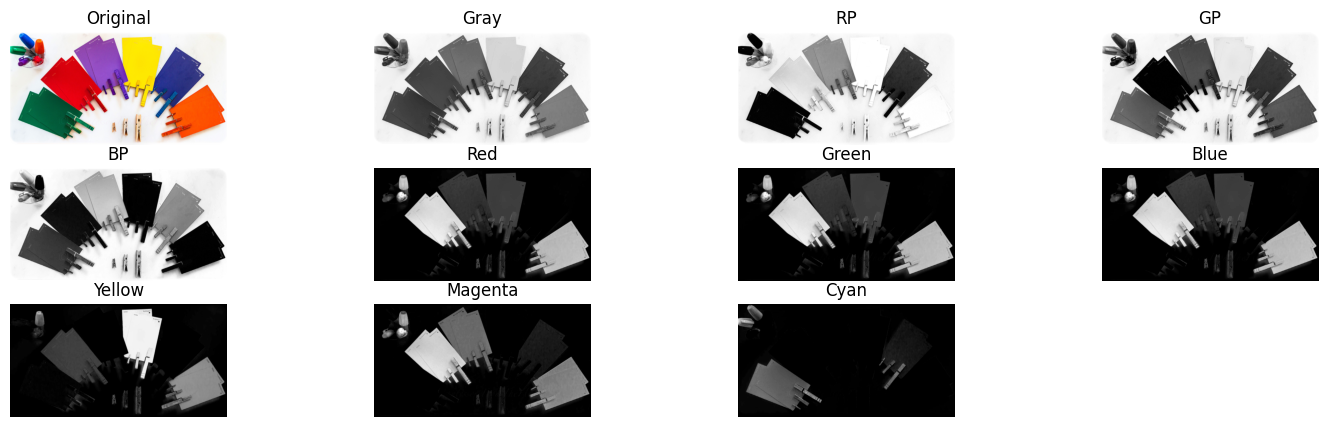

In [42]:

plt.figure(figsize = (18,5)) # create blank figure in which we make subplots
plt.subplot(3,4,1); imshow(img[:,:,::-1] , 'Original')
plt.subplot(3,4,2); imshow(gray,'Gray','gray')
plt.subplot(3,4,3); imshow(red_plane , 'RP','gray')
plt.subplot(3,4,4); imshow(green_plane , 'GP','gray')
plt.subplot(3,4,5); imshow(blue_plane , 'BP','gray')
plt.subplot(3,4,6); imshow(red_color , "Red","gray")
plt.subplot(3,4,7); imshow(green_color , "Green","gray")
plt.subplot(3,4,8); imshow(blue_color , "Blue","gray")
plt.subplot(3,4,9); imshow(yellow_color , "Yellow","gray")
plt.subplot(3,4,10); imshow(magenta_color , "Magenta","gray")
plt.subplot(3,4,11); imshow(cyan_color , "Cyan","gray")
    
plt.show()



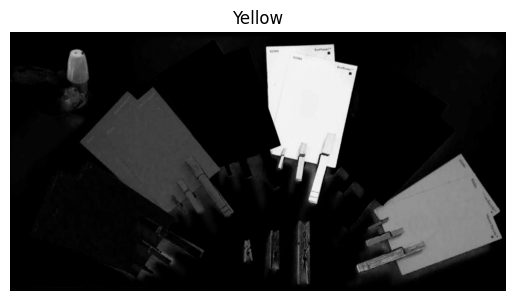

In [49]:
imshow(yellow_color , 'Yellow',"gray")
plt.show()

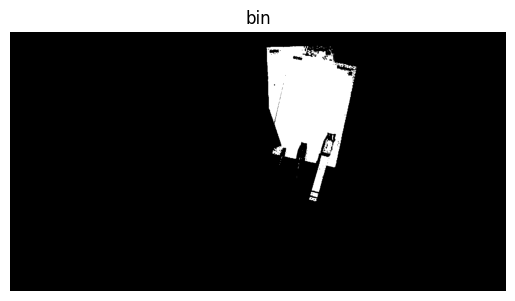

In [50]:
#Threshold Applying.
th, y_bw =  cv2.threshold(yellow_color , 200,255,cv2.THRESH_BINARY)
imshow(y_bw,'bin','gray')

In [51]:


#IMP
#Objective is to draw a rectangle around the desired output in original image.


In [52]:
import skimage as ski


In [55]:
rp = ski.measure.regionprops(y_bw)
len(rp)

1

In [58]:
rp0 = rp[0]
y1,x1,y2,x2 = rp0.bbox #y1,x1,y2,x2

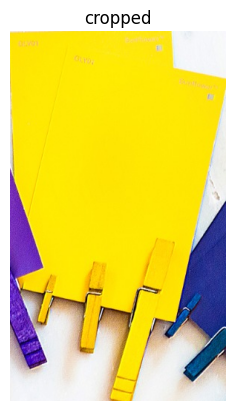

In [59]:
img_cropped = img[y1:y2,x1:x2,:].copy()
imshow(img_cropped[:,:,::-1],'cropped')

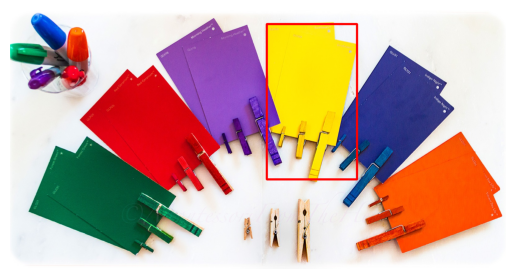

In [60]:
img_copy = img.copy()
cv2.rectangle(img_copy,(x1,y1),(x2,y2),color =[0,0,255],thickness =5)
imshow(img_copy[:,:,::-1],'')